# Appendix H.2 First clinic only (only male students) calculations

In [1]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from process_improvement import xmr_charts as xmr
from process_improvement import comparison_charts as cc

%matplotlib inline

## Step 1. Gather the data

In [2]:
# Get data
def get_data(dataset_url) -> pd.DataFrame:
    return pd.read_csv(dataset_url)

# Vienna url
rates_url = r'https://raw.githubusercontent.com/jimlehner/the-virus-of-variation/refs/heads/main/data/improvement-death-to-birth-rates.csv'
# Vienna General dataset url
rates_df = get_data(rates_url)

# Show first 10 lines of rates_df
rates_df.head(10)

# Show columns
rates_df.columns

Index(['Hospital', 'Stage', 'Year', 'Births', 'Deaths', 'Rate'], dtype='object')

### Drop  unnecessary columns from dataframe

In [3]:
rates_df = rates_df[[#'Hospital', 
                     'Stage', 
                     'Year', 
                     #'Births', 
                     #'Deaths', 
                     'Rate']]

# Make 'Value' column dtype string
rates_df['Year'] = rates_df['Year'].astype('string')

rates_df

,Stage,Year,Rate
0,After pathological anatomy,1823,7.50
1,After pathological anatomy,1824,4.90
2,After pathological anatomy,1825,8.80
3,After pathological anatomy,1826,8.10
4,After pathological anatomy,1827,2.20
5,After pathological anatomy,1828,3.60
6,After pathological anatomy,1829,4.60
7,After pathological anatomy,1830,4.00
8,After pathological anatomy,1831,6.60
9,After pathological anatomy,1832,3.20


### Splite dataframe according to stage

In [4]:
baseline_df = rates_df[rates_df['Stage'] == 'After pathological anatomy'].copy()
first_clinic_df = rates_df[rates_df['Stage'] == 'Only first clinic'].reset_index(drop=True)
second_clinic_df = rates_df[rates_df['Stage'] == 'Only second clinic'].reset_index(drop=True)

## Step 2. Calculate the moving ranges

In [5]:
# Calculate the moving ranges for before_df
first_clinic_df['Moving Ranges'] = abs(first_clinic_df['Rate'].diff())
first_clinic_df

,Stage,Year,Rate,Moving Ranges
0,Only first clinic,1841,7.8,NaN
1,Only first clinic,1842,15.8,8.0
2,Only first clinic,1843,9.0,6.8
3,Only first clinic,1844,8.2,0.8
4,Only first clinic,1845,6.9,1.3
5,Only first clinic,1846,11.4,4.5


## Step 3. Calculate the average moving range

In [6]:
# Calculate the average moving range for before_df['Moving Ranges']
first_ave_mR = round(first_clinic_df['Moving Ranges'].mean(),2)
first_ave_mR

4.28

## Step 4. Calculate the mean

In [7]:
# Calculate the mean before_df['Rate']
first_mean = round(first_clinic_df['Rate'].mean(),2)
first_mean

9.85

## Step 5. Calculate the process limits

In [8]:
# Upper Process Limit (UPL)
first_UPL = round(first_mean + (2.660*first_ave_mR),2)
# Lower Process Limit (LPL)
first_LPL = round(first_mean - (2.660*first_ave_mR),2)
# Upper Process Limit (UPL)
first_URL = round(3.268*first_ave_mR,2)
# Show results
print('UPL:', first_UPL)
print('LPL:', first_LPL)
print('URL:', first_URL)

UPL: 21.23
LPL: -1.53
URL: 13.99


## Step 6. Put it all together

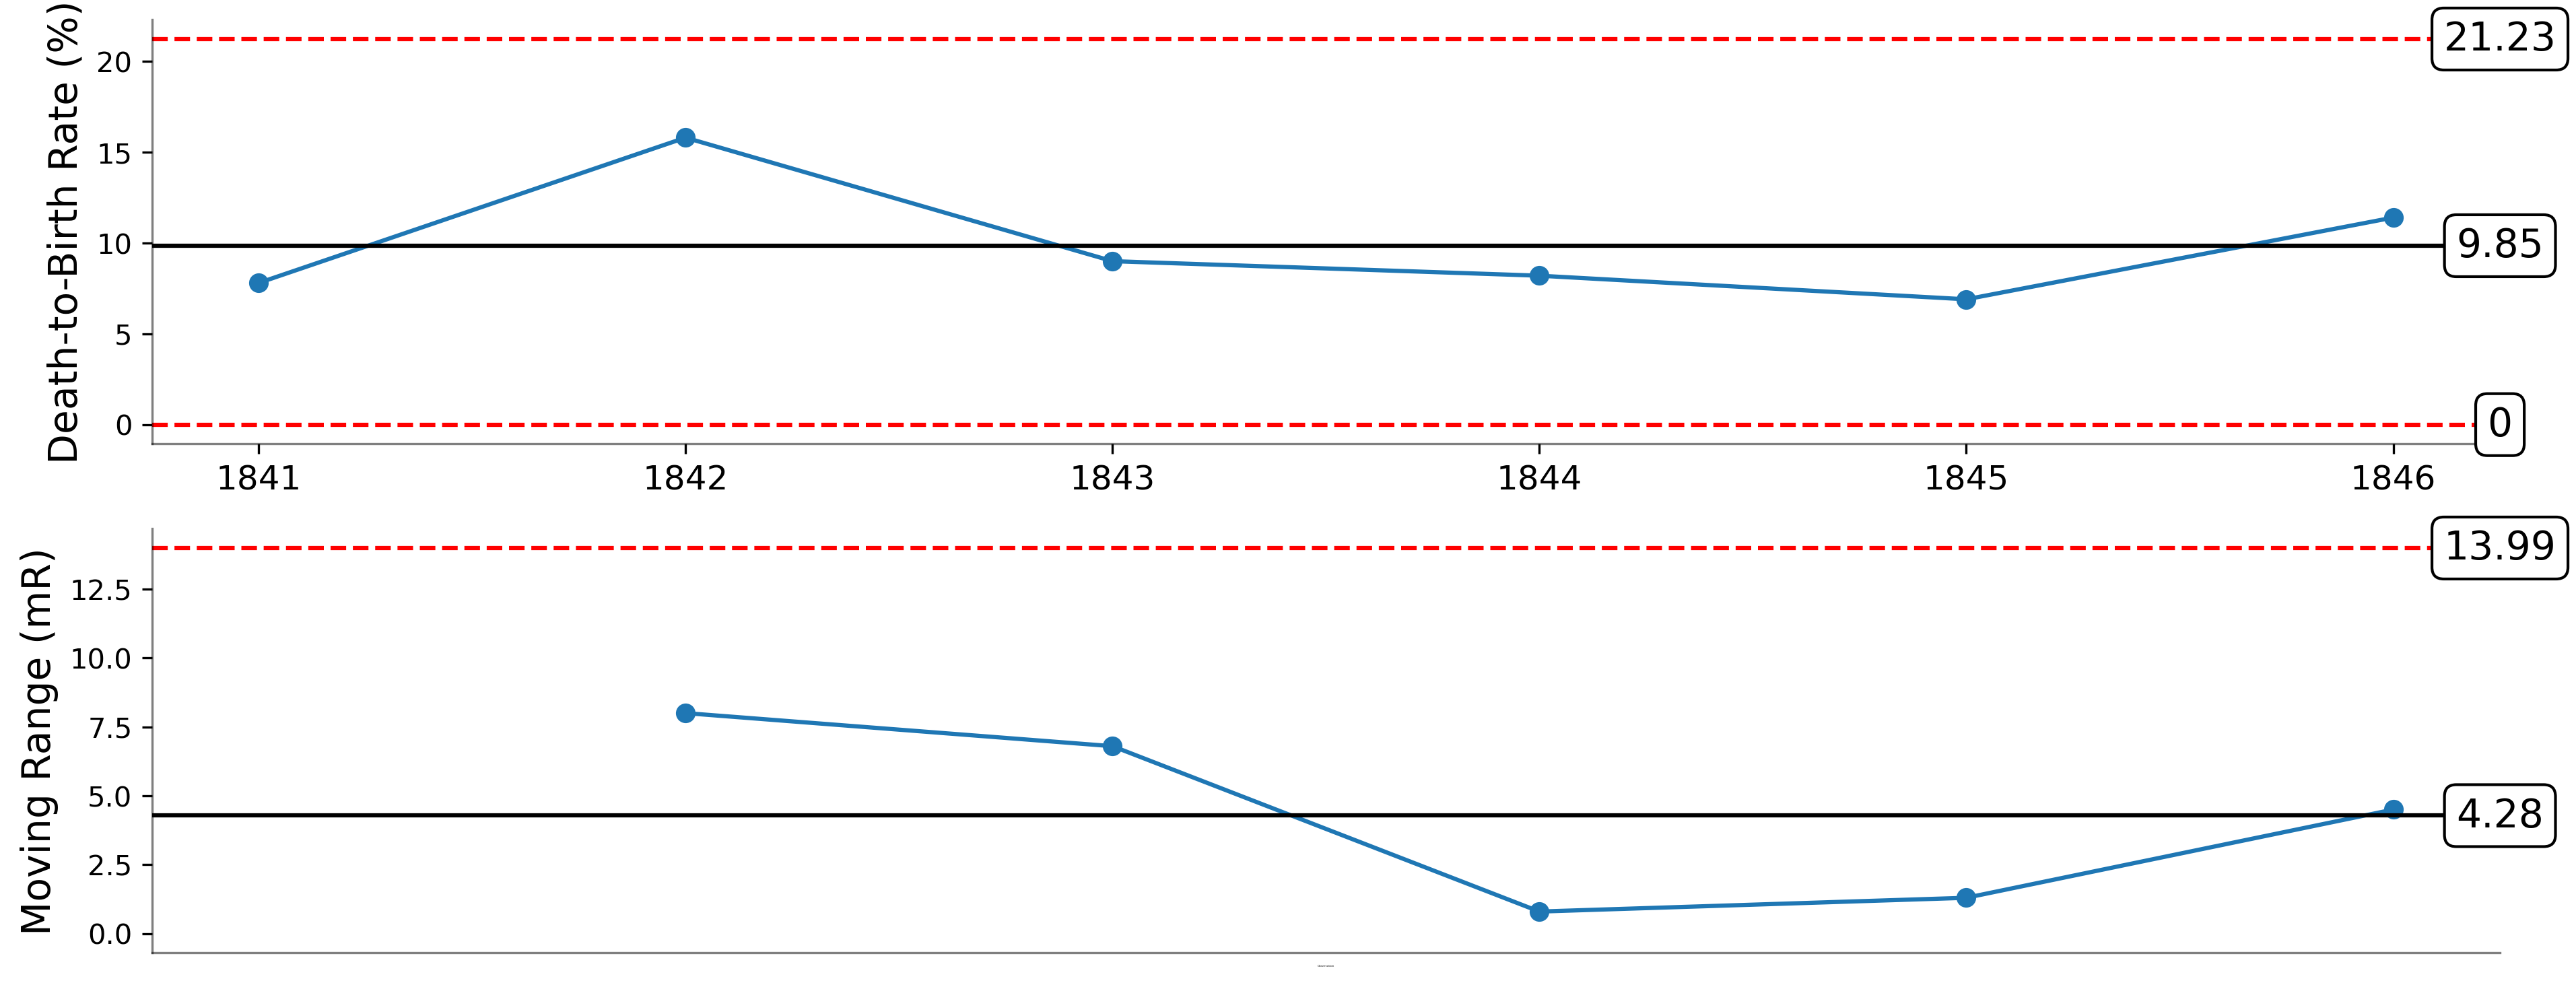

In [9]:
first_results = xmr.xmr_chart(first_clinic_df,
                                'Rate',
                                'Year',
                                tickinterval=1, 
                                round_value=2, 
                                label_fontsize=14,
                                xtick_fontsize=12, 
                                xchart_ylabel='Death-to-Birth Rate (%)')

In [10]:
first_results['XmR Chart Statistics']

,Chart,PBC Params,Param Values
0,X chart,Mean,9.85
1,X chart,UPL,21.23
2,X chart,LPL,0.00
3,X chart,PLR,21.23
4,mR chart,Ave. mR,4.28
5,mR chart,URL,13.99
